##### all system call commands are modified to fit my system, please make necessary changes to correctly retrieve data from your local device.

In [ ]:
pip install tensorflow keras sklearn matplotlib pandas pillow opencv-python

In [2]:
#importing required modules to create this project.
import numpy as np  #basic exploration and assist.
import pandas as pd #basic exploration and assist.
import matplotlib.pyplot as plt #to plot graphs.
import cv2 #to classify image and assist recognition.
import tensorflow as tf
from PIL import Image #to create image arrays etc.
import os #to allow operating system calls.
from sklearn.model_selection import train_test_split #scikit learn to split, test and train the data.
from tensorflow.keras.utils import to_categorical #to encode data to categories.
from keras.models import Sequential, load_model #to create our model which is sequential.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #to add layers to our model for accurate results.

##### dataset exploration

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#retrieving the images and their labels and appending said items in previously initialised lists.
for i in range(classes):
    path = os.path.join(cur_path,'/traffic-sign-classification/Train/',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#converting lists into numpy arrays to feed model.
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape) #The shape of data obtained is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value)

(39209, 30, 30, 3) (39209,)


In [6]:
#splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
#converting the labels into one-hot encoding of categories.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

##### building CNN model

In [8]:
#building the CNN model as CNN is best for image classification purposes.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) #2D convolution layer class that creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) #max pooling operation for 2D spatial data.
model.add(Dropout(rate=0.25)) #applies dropout layer that randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten()) #flattens the input without affecting the batch size.
model.add(Dense(256, activation='relu')) #regular densely-connected NN layer.
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

##### training and validation of model

In [9]:
#compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#we compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.
epochs = 15 #we tried with batch size 32 and 64. our model performed better with 64 batch size and after 15 epochs the accuracy was stable.
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 26s 51ms/step - loss: 2.1601 - accuracy: 0.4885 - val_loss: 0.3666 - val_accuracy: 0.9044
Epoch 2/15
491/491 [==============================] - 25s 51ms/step - loss: 0.5203 - accuracy: 0.8567 - val_loss: 0.2110 - val_accuracy: 0.9625
Epoch 3/15
491/491 [==============================] - 25s 50ms/step - loss: 0.2986 - accuracy: 0.9206 - val_loss: 0.0947 - val_accuracy: 0.9801
Epoch 4/15
491/491 [==============================] - 25s 51ms/step - loss: 0.2372 - accuracy: 0.9364 - val_loss: 0.0535 - val_accuracy: 0.9860
Epoch 5/15
491/491 [==============================] - 25s 51ms/step - loss: 0.1988 - accuracy: 0.9462 - val_loss: 0.0852 - val_accuracy: 0.9795
Epoch 6/15
491/491 [==============================] - 27s 54ms/step - loss: 0.1662 - accuracy: 0.9544 - val_loss: 0.0490 - val_accuracy: 0.9870
Epoch 7/15
491/491 [==============================] - 27s 54ms/step - loss: 0.1662 - accuracy: 0.9564 - val_loss: 0.0462 - val_accuracy:

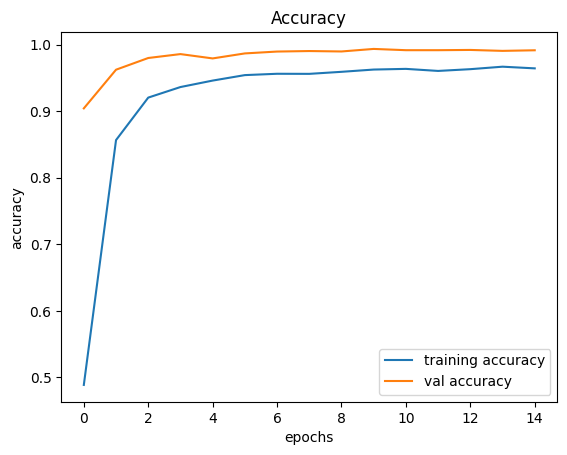

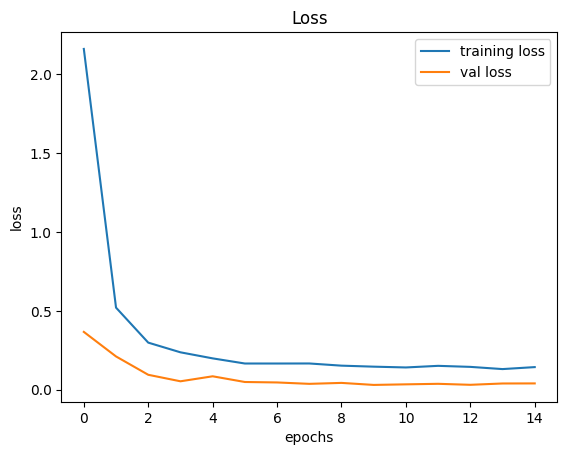

In [10]:
#with matplotlib, we plot the graph for accuracy and the loss.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##### testing model with test dataset

In [11]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 3s 7ms/step


In [12]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x)) #our model got a 96% accuracy.
model.save('traffic_classifier.h5')

0.9696753760886777


In [13]:
#imported required files for GUI. we are using tkinter as our core for the GUI.
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [14]:
#loading the trained model to classify sign via keras.
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [15]:
#creating dictionary to label all traffic sign classes.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

##### Run this kernel to execute program model

In [ ]:
#initialising the GUI (creating windows, buttons and functions).
#creating GUI main window first.
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
#classify function to predict and classify the uploaded test image to give output.
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    predict_classes = model.predict([image])[0] 
    pred = np.argmax(predict_classes)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='black', text=sign) 
#creating classify button ui that gives output on click.
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='black', foreground='black',font=('arial',14,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
#upload function that lets test image from local device to be uploaded for classification.
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/0.1),(top.winfo_height()/0.1)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
#upload button ui created that lets us upload test image for classification on click.
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='black', foreground='black',font=('arial',14,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
#heading and loops
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='black')
heading.pack()
top.mainloop()

#### - Team 9 
       Taneesh Parmar TE-3 37
       Himanshu Chaudhari TE-4 05
       Yajnesh Kharayat TE-4 23
       Varun Rajapure TE-4 42